
WPC Frontal Data?!?!
=========

Plots Fronts from WPC text files.
https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/fronts/catalog.html

* Data kept on server for approx. 1 month every (roughly) 3 hours -> not every time...


#### Imports

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import patheffects
outline_effect = [patheffects.withStroke(linewidth=3, foreground='black')]

from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot

In [117]:
extent=[-130, -65, 20, 65]
def create_map(extent=extent):
    # Set up the map projection
    proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[35])

    # Change the DPI of the resulting figure. Higher DPI drastically improves the
    # look of the text rendering.
    plt.rcParams['savefig.dpi'] = 255
    # Set the font 
    
    # Create the figure and an axes set to the projection.
    fig = plt.figure(figsize=(20, 10))
    add_metpy_logo(fig, 1100, 300, size='large')
    ax = fig.add_subplot(1, 1, 1, projection=proj)

    # Add some various map elements to the plot to make it recognizable.
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.BORDERS)

    # Set plot bounds
    ax.set_extent(extent)
    #ax.set_extent((-108.5, -102, 38.5, 41.5))
    #ax.set_extent((W-1.5,E+1.5,S-1.5,N+1.5))
    return fig,ax

#### Code to Parse Lat/Lon Frontal/METAR data

In [108]:
def front_parse_latlon(latlon_code="0560149",print_on=True):
    '''Grab lat and lon from coded values from WPC frontal analysis data
    
    Arguments
    ---------
    code : string
        ***** required - 7 digit string *****
        * format in XXXYYYY, with:
        XXX : 3-digit latitude; with a period in front of last digit
            ex. 384 -> 38.4 -> 38.4 deg north
            ex. 045 -> 04.5 -> 4.5 deg north
            ex. 009 -> 00.9 -> 0.9 deg north
        YYYY : 4-digit longitude; with a period in front of last digit
            ex. 1147 -> 114.7 -> 114.7 deg west
            ex. 0979 -> 097.9 -> 97.9 deg west
            ex. 0035 -> 003.5 -> 3.5 deg west
            
    Returns
    -------
    lat : str
        converted latitude
    lon : str
        converted longitude
    '''
    if len(latlon_code) != 7:
        raise Exception(f"Wrong number of digits in coded lat/lon: {latlon_code}\n\n"+\
                        f"Coded lat/lon number of digits: {len(latlon_code)}\n"+\
                        
                       "\nPlease check data and ensure you are given coded lat/lon pairs with 7 digits.\n"+\
                    "\nsee docs\n")
    lat_raw = latlon_code[0:3]
    lon_raw = latlon_code[3:]
    if print_on == True:
        print("-----------------------------------------------------")
        print(f"raw latitude: {lat_raw}\nraw longitude: {lon_raw}\n")
    
    lat = f"{latlon_code[0:2]}.{latlon_code[2:3]}".strip("00")
    lon = f"{latlon_code[3:-1]}.{latlon_code[-1:]}".strip("00")
    if print_on == True:
        print(f"converted latitude (N): {float(lat)}\nconverted longitude (W): {float(lon)}\n")
    
    return lat,lon

In [109]:
front_parse_latlon(latlon_code="065049",print_on=True)

Exception: Wrong number of digits in coded lat/lon: 065049

Coded lat/lon number of digits: 6

Please check data and ensure you are given coded lat/lon pairs with 7 digits.

see docs


#### Parse lat/lons for fronts and/or max/min

In [110]:
def get_front_lat_lon(fronts_data,index):
    
    fronts_data = fronts_data.iloc[index][0].split()
    
    fronts = [front_parse_latlon(i,print_on=False) for i in fronts_data[1:]]
    
    lats_fronts = [float(i[0]) for i in fronts]
    # make the longitudes negative since they are in degrees west
    lons_fronts = [-float(i[1]) for i in fronts]
    return lats_fronts,lons_fronts

---

## Read in the WPC frontal analysis from text file

In [111]:
fronts_data = pd.read_fwf("/Users/chowdahead/Downloads/Fronts_highres_KWBC_20201025_0000.txt",
                          header=None)

In [112]:
# quick look at data
fronts_data.head(20)

,0
0,
1,908
2,ASUS02 KWBC 250000
3,CODSUS
4,CODED SURFACE FRONTAL POSITIONS
5,NWS WEATHER PREDICTION CENTER COLLEGE PARK MD
6,931 PM EDT SAT OCT 24 2020
7,VALID 102500Z
8,HIGHS 1015 2050968 1025 4700809 1013 3711075 1...
9,5611264 1042 5501185 1042 5051136 1017 3340689


---

## Cold Fronts

In [10]:
fronts_data.shape[0]

150

#### Search through earch row to see if the first four characters are "COLD"
* place them in a list
    * for now, will probably be added to pandas dataframe instead eventually

In [11]:
cold_index = [i for i in range(fronts_data.shape[0]) if fronts_data.iloc[i][0][0:4] == "COLD"]
cold_index

[20, 32, 33, 35, 38, 54, 60, 96, 108, 109, 111, 114, 122]

#### Look at the data related to the 5th index of the cold front set (cold_index)

In [253]:
# second set of Lows range : fronts_data.iloc[86:90]
fronts_data.iloc[86:91]

,0
86,LOWS 1005 2301036 1007 6110797 1023 4770845 10...
87,3501149 1001 3741038 1003 4151056 1006 4291105...
88,5700600 1006 6390742 1009 7321413 1004 7891130...
89,7310740 1007 7330674 1005 6940789
90,TROF 2800824 2490836 2070836


In [248]:
front_str = "LOWS"
fronts_index = [i for i in range(fronts_data.shape[0]) if front_str in fronts_data.iloc[i][0]]
fronts_index

[10, 86]

In [ ]:
fronts_data.iloc[fronts_index][0].split()

In [13]:
# cold_index[4] : 38 -> row number in the dataframe
cold_data = fronts_data.iloc[cold_index[4]][0].split()
cold_data

['COLD',
 '5750589',
 '5630581',
 '5450585',
 '5310595',
 '5080615',
 '4760635',
 '4490666',
 '4140707',
 '3910734']

In [14]:
cold_latlon_pairs = [front_parse_latlon(i,print_on=False) for i in cold_data[1:]]
cold_latlon_pairs

[('57.5', '58.9'),
 ('56.3', '58.1'),
 ('54.5', '58.5'),
 ('53.1', '59.5'),
 ('50.8', '61.5'),
 ('47.6', '63.5'),
 ('44.9', '66.6'),
 ('41.4', '70.7'),
 ('39.1', '73.4')]

#### Make list for lat/lons for all the Cold Fronts

In [15]:
lats_cold = [float(i[0]) for i in cold_latlon_pairs]
lats_cold

[57.5, 56.3, 54.5, 53.1, 50.8, 47.6, 44.9, 41.4, 39.1]

In [16]:
# make the longitudes negative since they are in degrees west
lons_cold = [-float(i[1]) for i in cold_latlon_pairs]
lons_cold

[-58.9, -58.1, -58.5, -59.5, -61.5, -63.5, -66.6, -70.7, -73.4]

#### Plot the Highs, Lows, and Cold Fronts

In [93]:
df = pd.DataFrame({'name': "COLD",
                       'latitude': list(map(float, lats_cold)),
                       'longitude': list(map(float, lons_cold)),
                  },index=None)
type(df.latitude[0])

numpy.float64

In [94]:
df

,name,latitude,longitude
0,COLD,57.5,-58.9
1,COLD,56.3,-58.1
2,COLD,54.5,-58.5
3,COLD,53.1,-59.5
4,COLD,50.8,-61.5
5,COLD,47.6,-63.5
6,COLD,44.9,-66.6
7,COLD,41.4,-70.7
8,COLD,39.1,-73.4


In [98]:
#lats_warm,lons_warm
def add_latlon_to_df(df,lats,lons):
    """Add existing set of lat/lon pairs from specific front (Hi/Lo) 
    to the already created pandas dataframe
    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        existing dataframe to add new rows
        
    lats : list
        latitudes (must match dimensions of lons)
    
    lons : list
        longitudes (must match dimensions of lats)   
    
    Returns
    -------
    df : pandas.core.frame.DataFrame
        updated dataframe
    """
    for i in range(len(lats)):
        to_append = ["WARM",lats[i],lons[i]]
        to_series = pd.Series(to_append, index = df.columns)
        df = df.append(to_series, ignore_index=True)
    return df

In [99]:
df = add_latlon_to_df(df,lats_warm,lons_warm)

In [104]:
df

,name,latitude,longitude
0,COLD,57.5,-58.9
1,COLD,56.3,-58.1
2,COLD,54.5,-58.5
3,COLD,53.1,-59.5
4,COLD,50.8,-61.5
5,COLD,47.6,-63.5
6,COLD,44.9,-66.6
7,COLD,41.4,-70.7
8,COLD,39.1,-73.4
9,WARM,57.5,-58.9


In [72]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ["a", "b"])
print(df)

   a  b
0  1  2
1  3  4


In [73]:
to_append = [5, 6]
df_length = len(df)
df.loc[df_length] = to_append

In [75]:
a_series = pd.Series(to_append, index = df.columns)
df = df.append(a_series, ignore_index=True)

In [76]:
df

,a,b
0,1,2
1,3,4
2,5,6
3,5,6


In [ ]:
columns=['User_ID', 'UserName', 'Action']

In [60]:
df = df.append({'name': "WARM",
                       'latitude': list(map(float, lats_warm)),
                       'longitude': list(map(float, lons_warm)),
                       },
                ignore_index=True)


In [61]:
df

,name,latitude,longitude
0,LOWS,57.5,-58.9
1,LOWS,56.3,-58.1
2,LOWS,54.5,-58.5
3,LOWS,53.1,-59.5
4,LOWS,50.8,-61.5
5,LOWS,47.6,-63.5
6,LOWS,44.9,-66.6
7,LOWS,41.4,-70.7
8,LOWS,39.1,-73.4
9,WARM,"[57.5, 57.1, 55.8, 54.5]","[-58.9, -55.9, -52.5, -50.3]"


In [33]:
lons_cold = df.lons.values[0]

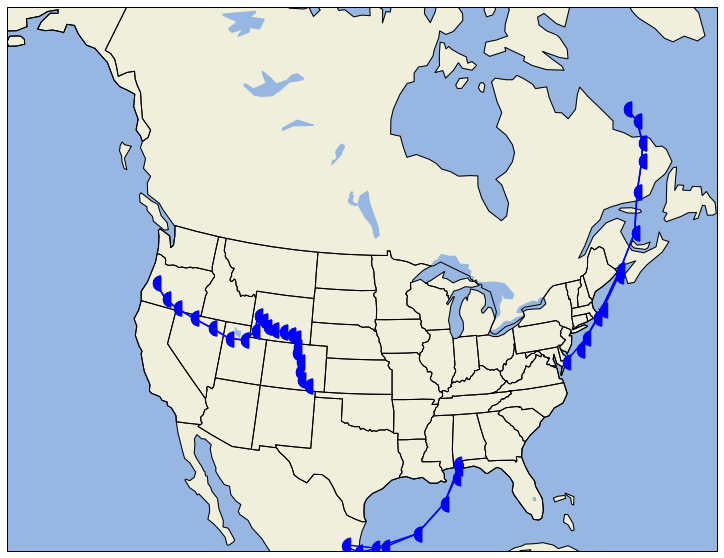

In [125]:
fig,ax = create_map()
t = mpl.markers.MarkerStyle(marker='$\u25D6$')
for i in cold_index:  
    lats_cold,lons_cold = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_cold, lats_cold, marker='$\u25D6$',ms=15,color='blue', 
         transform=ccrs.PlateCarree())
plt.show()

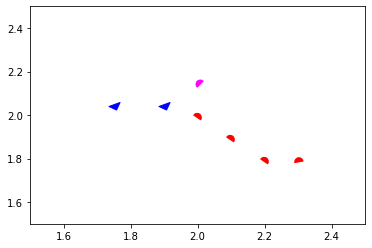

In [128]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# - - - - - - - - - Warm Front - - - - - - - - - 

t = mpl.markers.MarkerStyle(marker='$\u25D6$')
#t = '$\u25D6$'
angle = 100+180
t._transform = t.get_transform().rotate_deg(angle)
plt.scatter(2.3, 1.8, marker = t, s=70, linestyle='None',color="r")

t = mpl.markers.MarkerStyle(marker='$\u25D6$')
#t = '$\u25D6$'
angle = 56+180
t._transform = t.get_transform().rotate_deg(angle)

plt.scatter(2, 2, marker = t, s=70, linestyle='None',color="r")
plt.scatter(2.1, 1.9, marker = t, s=70, linestyle='None',color="r")
plt.scatter(2.2, 1.8, marker = t, s=70, linestyle='None',color="r")

# - - - - - - - - - Occluded Front - - - - - - - - - 

t = mpl.markers.MarkerStyle(marker='$\u25D6$')
#t = '$\u25D6$'
angle = 360-45
t._transform = t.get_transform().rotate_deg(angle)

plt.scatter(2., 2.15, marker = t, s=70, linestyle='None',color="magenta")
#plt.scatter(2.1, 1.9, marker = t, s=70, linestyle='None',color="magenta")
#plt.scatter(2.2, 1.8, marker = t, s=70, linestyle='None',color="magenta")

# - - - - - - - - - Cold Front - - - - - - - - - 

t = mpl.markers.MarkerStyle(marker='$\u25E3$')
#t = '$\u25D6$'
angle = 245-180
t._transform = t.get_transform().rotate_deg(angle)
plt.scatter(1.9, 2.05, marker = t, s=70, linestyle='None',color="b")
plt.scatter(1.75, 2.05, marker = t, s=70, linestyle='None',color="b")


plt.xlim([1.5,2.5])
plt.ylim([1.5,2.5])

#plt.show()
plt.savefig("/Users/chowdahead/not_quite_fronts.png",bbox_inches="tight")

---

## Warm Fronts

In [36]:
warm_index = []
for i in range(fronts_data.shape[0]):
    if fronts_data.iloc[i][0][0:4] == "WARM":
        print(i," ",fronts_data.iloc[i][0][0:4])
        warm_index.append(i)

67   WARM
69   WARM
119   WARM
143   WARM


In [37]:
warm_index = [i for i in range(fronts_data.shape[0]) if fronts_data.iloc[i][0][0:4] == "WARM"]

In [38]:
for i in warm_index:    
    lats_warm,lons_warm = get_front_lat_lon(fronts_data,i)

#### Plot the Highs, Lows, Cold and Warm Fronts

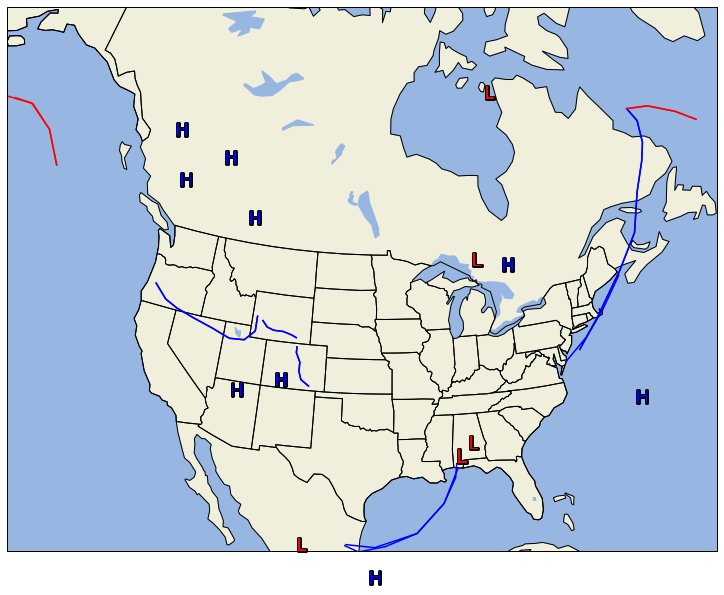

In [219]:
fig,ax = create_map()

for i in cold_index:  
    lats_cold,lons_cold = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_cold, lats_cold, color='blue', 
         transform=ccrs.PlateCarree())
for i in warm_index:  
    lats_warm,lons_warm = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_warm, lats_warm, color='red', 
         transform=ccrs.PlateCarree())
plt.show()

---

## Stationary Fronts

In [91]:
stnry_index = []
for i in range(fronts_data.shape[0]):
    if fronts_data.iloc[i][0][0:5] == "STNRY":
        print(i," ",fronts_data.iloc[i][0][0:4])
        stnry_index.append(i)

21   STNR
25   STNR
26   STNR
27   STNR
29   STNR
30   STNR
31   STNR
34   STNR
37   STNR
52   STNR
59   STNR
65   STNR
71   STNR
97   STNR
101   STNR
103   STNR
105   STNR
106   STNR
107   STNR
110   STNR
113   STNR
131   STNR
136   STNR
141   STNR
145   STNR


In [220]:
stnry_index = [i for i in range(fronts_data.shape[0]) if fronts_data.iloc[i][0][0:5] == "STNRY"]

#### Plot the Highs, Lows, Cold, Warm, and Stationary Fronts

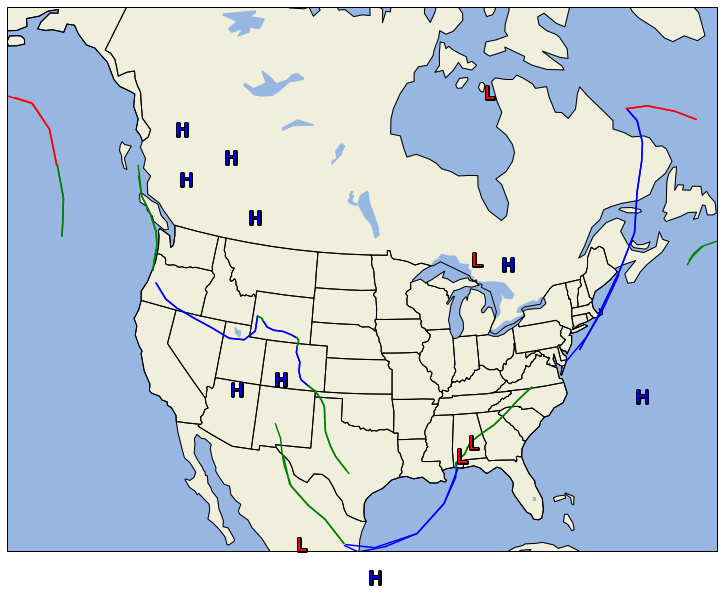

In [222]:
fig,ax = create_map()

for i in cold_index:  
    lats_cold,lons_cold = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_cold, lats_cold, color='blue', 
         transform=ccrs.PlateCarree())
for i in warm_index:  
    lats_warm,lons_warm = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_warm, lats_warm, color='red', 
         transform=ccrs.PlateCarree())
for i in stnry_index:  
    lats_stnry,lons_stnry = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_stnry, lats_stnry, color='green', 
         transform=ccrs.PlateCarree())
plt.show()

---

## Occluded Fronts

In [96]:
occ_index = []
for i in range(fronts_data.shape[0]):
    if fronts_data.iloc[i][0][0:5] == "OCFNT":
        print(i," ",fronts_data.iloc[i][0][0:4])
        occ_index.append(i)

66   OCFN
68   OCFN
142   OCFN
144   OCFN


In [223]:
occ_index = [i for i in range(fronts_data.shape[0]) if fronts_data.iloc[i][0][0:5] == "OCFNT"]

#### Plot the Highs, Lows, Cold, Warm, Stationary, and Occluded Fronts

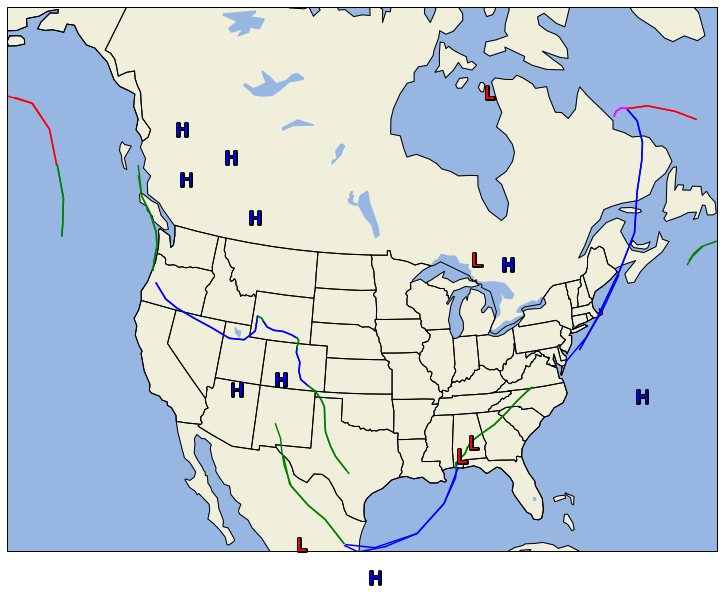

In [224]:
fig,ax = create_map()

for i in cold_index:  
    lats_cold,lons_cold = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_cold, lats_cold, color='blue', 
         transform=ccrs.PlateCarree())
for i in warm_index:  
    lats_warm,lons_warm = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_warm, lats_warm, color='red', 
         transform=ccrs.PlateCarree())
for i in stnry_index:  
    lats_stnry,lons_stnry = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_stnry, lats_stnry, color='green', 
         transform=ccrs.PlateCarree())
for i in occ_index:  
    lats_occ,lons_occ = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_occ, lats_occ, color='magenta', 
         transform=ccrs.PlateCarree())
plt.show()

---

## TROFs

In [99]:
trof_index = []
for i in range(fronts_data.shape[0]):
    if fronts_data.iloc[i][0][0:4] == "TROF":
        print(i," ",fronts_data.iloc[i][0][0:4])
        trof_index.append(i)

14   TROF
15   TROF
16   TROF
17   TROF
18   TROF
19   TROF
22   TROF
23   TROF
24   TROF
28   TROF
40   TROF
41   TROF
42   TROF
43   TROF
44   TROF
45   TROF
46   TROF
47   TROF
48   TROF
49   TROF
51   TROF
53   TROF
55   TROF
56   TROF
57   TROF
58   TROF
61   TROF
62   TROF
63   TROF
64   TROF
70   TROF
72   TROF
73   TROF
74   TROF
90   TROF
91   TROF
92   TROF
93   TROF
94   TROF
95   TROF
98   TROF
99   TROF
100   TROF
102   TROF
104   TROF
116   TROF
117   TROF
118   TROF
120   TROF
121   TROF
123   TROF
124   TROF
125   TROF
126   TROF
127   TROF
128   TROF
130   TROF
132   TROF
133   TROF
134   TROF
135   TROF
137   TROF
138   TROF
139   TROF
140   TROF
146   TROF
147   TROF


In [225]:
trof_index = [i for i in range(fronts_data.shape[0]) if fronts_data.iloc[i][0][0:4] == "TROF"]

#### Plot the Highs, Lows, Cold, Warm, Stationary, Occluded Fronts and Trofs

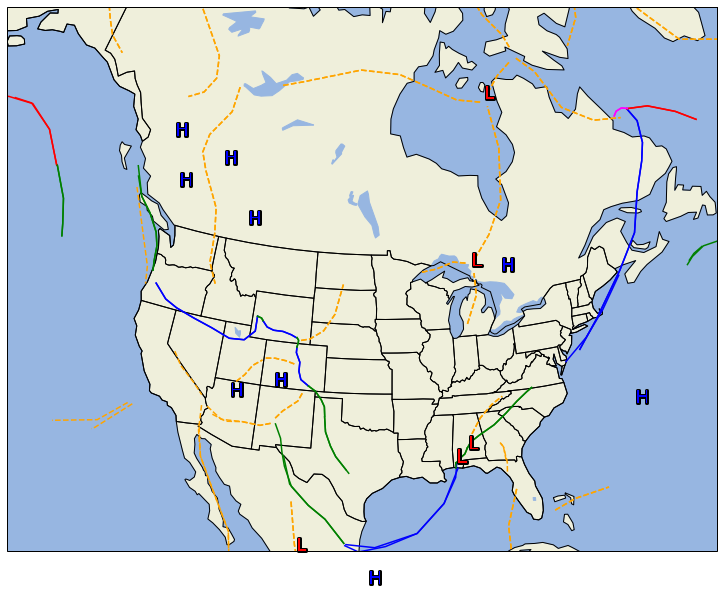

In [227]:
fig,ax = create_map()

for i in cold_index:  
    lats_cold,lons_cold = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_cold, lats_cold, color='blue', 
         transform=ccrs.PlateCarree())
for i in warm_index:  
    lats_warm,lons_warm = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_warm, lats_warm, color='red', 
         transform=ccrs.PlateCarree())
for i in stnry_index:  
    lats_stnry,lons_stnry = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_stnry, lats_stnry, color='green', 
         transform=ccrs.PlateCarree())
for i in occ_index:  
    lats_occ,lons_occ = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_occ, lats_occ, color='magenta', 
         transform=ccrs.PlateCarree())
for i in trof_index:  
    lats_trof,lons_trof = get_front_lat_lon(fronts_data,i)
    plt.plot(lons_trof, lats_trof, color='orange',linestyle="--", 
         transform=ccrs.PlateCarree())
plt.show()

---

---